In [88]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
import IPython.display
import soundfile as sf
import os
import errno
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [89]:
import glob
savee_clean_list = glob.glob('clean/Users/ioann/saveelist/*.wav')
savee_clean_list


['clean/Users/ioann/saveelist\\a01(1).wav',
 'clean/Users/ioann/saveelist\\a01(2).wav',
 'clean/Users/ioann/saveelist\\a01(3).wav',
 'clean/Users/ioann/saveelist\\a01(4).wav',
 'clean/Users/ioann/saveelist\\a02(1).wav',
 'clean/Users/ioann/saveelist\\a02(2).wav',
 'clean/Users/ioann/saveelist\\a02(3).wav',
 'clean/Users/ioann/saveelist\\a02(4).wav',
 'clean/Users/ioann/saveelist\\a03(1).wav',
 'clean/Users/ioann/saveelist\\a03(2).wav',
 'clean/Users/ioann/saveelist\\a03(3).wav',
 'clean/Users/ioann/saveelist\\a03(4).wav',
 'clean/Users/ioann/saveelist\\a04(1).wav',
 'clean/Users/ioann/saveelist\\a04(2).wav',
 'clean/Users/ioann/saveelist\\a04(3).wav',
 'clean/Users/ioann/saveelist\\a04(4).wav',
 'clean/Users/ioann/saveelist\\a05(1).wav',
 'clean/Users/ioann/saveelist\\a05(2).wav',
 'clean/Users/ioann/saveelist\\a05(3).wav',
 'clean/Users/ioann/saveelist\\a05(4).wav',
 'clean/Users/ioann/saveelist\\a06(1).wav',
 'clean/Users/ioann/saveelist\\a06(2).wav',
 'clean/Users/ioann/saveelist\\a

In [90]:
def build_savee_index(file_list):
    
    emotion_key = {'n': 'neutral', 'h': 'happy', 'sa': 'sad', 'a': 'angry', 'f': 'fearful', 'd': 'disgusted', 'su': 'surprised'}
    df = { 'emotion': [] }
   

    for file in file_list:
        

        props = file.split('/')[3][10:]
       
        df['emotion'].append(emotion_key[props[ :-9]])
       

       

    file_properties = pd.DataFrame(df)
    
    return file_properties

In [91]:
emotion_list = build_savee_index(savee_clean_list)

In [92]:
labels_savee = pd.DataFrame(emotion_list)

In [93]:
df = pd.DataFrame(columns=['feature'])
bookmark=0



path = '/Users/ioann/saveelist/'




for subdir, dirs, files in os.walk(path):
    for file in files:
      
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        feature = mfccs
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1

In [94]:
features_savee= pd.DataFrame(df['feature'].values.tolist())


newdf = pd.concat([features_savee,labels_savee], axis=1)
savee_new = newdf.rename(index=str, columns={"0": "label"})

In [95]:
savee_new=savee_new.fillna(0)

In [96]:
savee_new

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
0,-320.564897,110.933802,12.457851,34.670754,11.628866,-2.938117,-24.859946,-2.633693,-0.919507,-11.532021,...,1.783171,3.263025,2.756852,3.496057,5.099579,4.885279,5.633801,4.365917,3.453820,angry
1,-244.658678,104.249248,0.657434,41.458732,-1.098887,3.049909,-23.316795,-7.371824,-7.313963,-5.459172,...,4.278307,4.096044,2.962424,3.240562,0.578126,1.794270,3.656604,4.363981,3.638848,angry
2,-269.983041,100.689812,4.812852,44.206061,-9.372619,-17.481868,0.876082,2.226196,-16.333266,-3.812531,...,4.117299,3.856427,4.716765,6.389915,5.546877,4.826904,4.839705,4.608056,4.928732,angry
3,-564.540326,104.181913,26.302574,44.703341,17.196513,-4.453330,-15.700971,-2.773550,-5.163968,-11.310603,...,-1.982804,-0.331088,-2.861281,-2.723364,0.419460,2.015126,1.980087,-0.398496,-0.039357,angry
4,-299.408527,120.059306,-7.834544,18.676239,14.225895,-2.376180,-20.357823,3.748768,4.587472,-11.664485,...,1.525852,1.987423,0.174960,-0.661590,-0.089371,-0.488558,1.521584,1.066419,-0.393785,angry
5,-268.415152,102.647185,-6.831019,21.777451,5.504902,2.677995,-17.891163,-4.412988,-3.229257,0.431965,...,0.943443,-0.501339,-0.080925,0.131035,-1.918740,1.268647,2.679410,2.754248,3.670862,angry
6,-270.433462,102.251276,-7.766242,27.726690,-2.322103,-15.604451,0.235773,0.016892,-12.838433,-0.243834,...,1.750614,2.308556,1.087831,0.177460,-1.091181,-0.377372,-0.434003,-0.327013,-0.177506,angry
7,-578.971084,153.140748,12.843857,13.583781,5.480952,-4.754079,-7.061755,1.223524,-7.304688,-13.289818,...,-0.245226,-0.666285,-2.915523,-1.297646,-1.285307,-1.099492,0.359853,-2.147516,-1.808127,angry
8,-337.160749,96.866740,4.881764,26.825063,10.724669,-2.182416,-13.945372,7.127122,-0.079204,-7.433390,...,3.103378,4.924483,6.009026,6.636278,6.517982,6.425938,4.764662,3.565150,4.918953,angry
9,-313.978572,82.632110,3.121088,25.119724,6.733781,2.579732,-13.853373,0.178914,-1.616934,1.959738,...,0.141898,1.821391,2.529989,1.968246,2.439394,3.644267,3.000721,4.114735,5.142286,angry


In [97]:
def build_savee_onesub(file_list):
    
   
    df = { 'actor': [] }
   

    for file in file_list:
        

        props = file.split('/')[3][10:]
        df['actor'].append(props[-7:-4])
       

       

    file_properties = pd.DataFrame(df)
    
    return file_properties






    

In [98]:
actor_list=build_ravdess_onesub(savee_clean_list)
actor = pd.DataFrame(actor_list)

In [99]:
newdf = pd.concat([features_savee,labels_savee,actor], axis=1)
savee_new = newdf.rename(index=str, columns={"0": "label"})

In [100]:
actor

,actor
0,(1)
1,(2)
2,(3)
3,(4)
4,(1)
5,(2)
6,(3)
7,(4)
8,(1)
9,(2)


In [101]:
savee_new

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,emotion,actor
0,-320.564897,110.933802,12.457851,34.670754,11.628866,-2.938117,-24.859946,-2.633693,-0.919507,-11.532021,...,3.263025,2.756852,3.496057,5.099579,4.885279,5.633801,4.365917,3.453820,angry,(1)
1,-244.658678,104.249248,0.657434,41.458732,-1.098887,3.049909,-23.316795,-7.371824,-7.313963,-5.459172,...,4.096044,2.962424,3.240562,0.578126,1.794270,3.656604,4.363981,3.638848,angry,(2)
2,-269.983041,100.689812,4.812852,44.206061,-9.372619,-17.481868,0.876082,2.226196,-16.333266,-3.812531,...,3.856427,4.716765,6.389915,5.546877,4.826904,4.839705,4.608056,4.928732,angry,(3)
3,-564.540326,104.181913,26.302574,44.703341,17.196513,-4.453330,-15.700971,-2.773550,-5.163968,-11.310603,...,-0.331088,-2.861281,-2.723364,0.419460,2.015126,1.980087,-0.398496,-0.039357,angry,(4)
4,-299.408527,120.059306,-7.834544,18.676239,14.225895,-2.376180,-20.357823,3.748768,4.587472,-11.664485,...,1.987423,0.174960,-0.661590,-0.089371,-0.488558,1.521584,1.066419,-0.393785,angry,(1)
5,-268.415152,102.647185,-6.831019,21.777451,5.504902,2.677995,-17.891163,-4.412988,-3.229257,0.431965,...,-0.501339,-0.080925,0.131035,-1.918740,1.268647,2.679410,2.754248,3.670862,angry,(2)
6,-270.433462,102.251276,-7.766242,27.726690,-2.322103,-15.604451,0.235773,0.016892,-12.838433,-0.243834,...,2.308556,1.087831,0.177460,-1.091181,-0.377372,-0.434003,-0.327013,-0.177506,angry,(3)
7,-578.971084,153.140748,12.843857,13.583781,5.480952,-4.754079,-7.061755,1.223524,-7.304688,-13.289818,...,-0.666285,-2.915523,-1.297646,-1.285307,-1.099492,0.359853,-2.147516,-1.808127,angry,(4)
8,-337.160749,96.866740,4.881764,26.825063,10.724669,-2.182416,-13.945372,7.127122,-0.079204,-7.433390,...,4.924483,6.009026,6.636278,6.517982,6.425938,4.764662,3.565150,4.918953,angry,(1)
9,-313.978572,82.632110,3.121088,25.119724,6.733781,2.579732,-13.853373,0.178914,-1.616934,1.959738,...,1.821391,2.529989,1.968246,2.439394,3.644267,3.000721,4.114735,5.142286,angry,(2)


In [105]:
#test ston 4
train=(savee_new.loc[savee_new['actor'] != '(4)'])


In [106]:
train


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,emotion,actor
0,-320.564897,110.933802,12.457851,34.670754,11.628866,-2.938117,-24.859946,-2.633693,-0.919507,-11.532021,...,3.263025,2.756852,3.496057,5.099579,4.885279,5.633801,4.365917,3.453820,angry,(1)
1,-244.658678,104.249248,0.657434,41.458732,-1.098887,3.049909,-23.316795,-7.371824,-7.313963,-5.459172,...,4.096044,2.962424,3.240562,0.578126,1.794270,3.656604,4.363981,3.638848,angry,(2)
2,-269.983041,100.689812,4.812852,44.206061,-9.372619,-17.481868,0.876082,2.226196,-16.333266,-3.812531,...,3.856427,4.716765,6.389915,5.546877,4.826904,4.839705,4.608056,4.928732,angry,(3)
4,-299.408527,120.059306,-7.834544,18.676239,14.225895,-2.376180,-20.357823,3.748768,4.587472,-11.664485,...,1.987423,0.174960,-0.661590,-0.089371,-0.488558,1.521584,1.066419,-0.393785,angry,(1)
5,-268.415152,102.647185,-6.831019,21.777451,5.504902,2.677995,-17.891163,-4.412988,-3.229257,0.431965,...,-0.501339,-0.080925,0.131035,-1.918740,1.268647,2.679410,2.754248,3.670862,angry,(2)
6,-270.433462,102.251276,-7.766242,27.726690,-2.322103,-15.604451,0.235773,0.016892,-12.838433,-0.243834,...,2.308556,1.087831,0.177460,-1.091181,-0.377372,-0.434003,-0.327013,-0.177506,angry,(3)
8,-337.160749,96.866740,4.881764,26.825063,10.724669,-2.182416,-13.945372,7.127122,-0.079204,-7.433390,...,4.924483,6.009026,6.636278,6.517982,6.425938,4.764662,3.565150,4.918953,angry,(1)
9,-313.978572,82.632110,3.121088,25.119724,6.733781,2.579732,-13.853373,0.178914,-1.616934,1.959738,...,1.821391,2.529989,1.968246,2.439394,3.644267,3.000721,4.114735,5.142286,angry,(2)
10,-306.813008,91.202088,4.837953,35.295787,-4.541257,-15.186219,-1.853829,2.134356,-8.612269,0.580285,...,2.827478,2.024559,1.230836,1.951512,3.221304,4.017343,4.348317,3.054402,angry,(3)
12,-287.823871,101.515510,6.410148,15.656604,7.395868,-1.489299,-24.872378,-5.148656,-0.039547,-10.816283,...,2.069620,1.789086,1.402842,1.192773,2.013896,2.935015,3.895297,5.941611,angry,(1)


In [107]:
trainfeatures = train.iloc[:, :-2]
trainlabel = train.iloc[:, -2]

In [109]:
trainfeatures


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-320.564897,110.933802,12.457851,34.670754,11.628866,-2.938117,-24.859946,-2.633693,-0.919507,-11.532021,...,1.452810,1.783171,3.263025,2.756852,3.496057,5.099579,4.885279,5.633801,4.365917,3.453820
1,-244.658678,104.249248,0.657434,41.458732,-1.098887,3.049909,-23.316795,-7.371824,-7.313963,-5.459172,...,2.513106,4.278307,4.096044,2.962424,3.240562,0.578126,1.794270,3.656604,4.363981,3.638848
2,-269.983041,100.689812,4.812852,44.206061,-9.372619,-17.481868,0.876082,2.226196,-16.333266,-3.812531,...,2.308230,4.117299,3.856427,4.716765,6.389915,5.546877,4.826904,4.839705,4.608056,4.928732
4,-299.408527,120.059306,-7.834544,18.676239,14.225895,-2.376180,-20.357823,3.748768,4.587472,-11.664485,...,1.049761,1.525852,1.987423,0.174960,-0.661590,-0.089371,-0.488558,1.521584,1.066419,-0.393785
5,-268.415152,102.647185,-6.831019,21.777451,5.504902,2.677995,-17.891163,-4.412988,-3.229257,0.431965,...,-1.543827,0.943443,-0.501339,-0.080925,0.131035,-1.918740,1.268647,2.679410,2.754248,3.670862
6,-270.433462,102.251276,-7.766242,27.726690,-2.322103,-15.604451,0.235773,0.016892,-12.838433,-0.243834,...,0.540800,1.750614,2.308556,1.087831,0.177460,-1.091181,-0.377372,-0.434003,-0.327013,-0.177506
8,-337.160749,96.866740,4.881764,26.825063,10.724669,-2.182416,-13.945372,7.127122,-0.079204,-7.433390,...,2.997824,3.103378,4.924483,6.009026,6.636278,6.517982,6.425938,4.764662,3.565150,4.918953
9,-313.978572,82.632110,3.121088,25.119724,6.733781,2.579732,-13.853373,0.178914,-1.616934,1.959738,...,0.892974,0.141898,1.821391,2.529989,1.968246,2.439394,3.644267,3.000721,4.114735,5.142286
10,-306.813008,91.202088,4.837953,35.295787,-4.541257,-15.186219,-1.853829,2.134356,-8.612269,0.580285,...,2.296859,3.049797,2.827478,2.024559,1.230836,1.951512,3.221304,4.017343,4.348317,3.054402
12,-287.823871,101.515510,6.410148,15.656604,7.395868,-1.489299,-24.872378,-5.148656,-0.039547,-10.816283,...,0.094653,1.922031,2.069620,1.789086,1.402842,1.192773,2.013896,2.935015,3.895297,5.941611


In [110]:
test=(savee_new.loc[savee_new['actor'] == '(4)'])

In [111]:
test

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,emotion,actor
3,-564.540326,104.181913,26.302574,44.703341,17.196513,-4.453330,-15.700971,-2.773550,-5.163968,-11.310603,...,-0.331088,-2.861281,-2.723364,0.419460,2.015126,1.980087,-0.398496,-0.039357,angry,(4)
7,-578.971084,153.140748,12.843857,13.583781,5.480952,-4.754079,-7.061755,1.223524,-7.304688,-13.289818,...,-0.666285,-2.915523,-1.297646,-1.285307,-1.099492,0.359853,-2.147516,-1.808127,angry,(4)
11,-619.683106,107.612664,29.545496,32.781815,13.113059,-2.023275,-6.724471,3.051477,-1.109710,-7.053607,...,-0.458534,-4.041868,-0.373413,1.693426,3.119295,6.467952,6.222947,7.158575,angry,(4)
15,-545.899780,94.282328,22.473580,21.962141,11.071408,2.064249,-9.974123,-5.297741,-6.165273,-9.604840,...,2.563572,0.236307,0.642036,-1.301531,-0.757510,0.594631,0.517790,2.317307,angry,(4)
19,-554.916555,119.247173,20.049515,24.732460,4.934111,-6.313914,-15.549304,-7.235226,-9.178871,-13.237397,...,0.141774,-2.123241,-1.487538,-1.147595,-0.665070,1.203635,0.748611,1.120355,angry,(4)
23,-556.890651,114.073488,21.399754,37.684455,1.765665,-5.789695,-11.279757,-0.880750,-7.797464,-12.325886,...,-0.065403,-2.161767,-0.434520,-0.591449,0.751506,1.570371,-1.204428,0.389953,angry,(4)
27,-467.870606,150.702668,6.940878,13.059629,-6.794840,-23.409382,-11.542217,2.467216,-15.035852,-23.422054,...,-4.088092,-5.701839,-0.011955,-4.946802,-1.943001,-3.436878,-6.409079,-2.927387,angry,(4)
31,-541.217535,105.199223,27.676684,37.588070,-3.294961,-10.418538,-13.410785,-5.323685,-6.183341,-11.882535,...,-0.586632,-4.954134,-1.064318,-0.384095,-1.790688,1.761139,0.799863,0.604888,angry,(4)
35,-543.859655,112.917006,18.446394,32.423643,14.059578,-2.207321,-13.861190,-6.286025,-8.941018,-9.747371,...,-2.476502,-2.233822,-0.877613,-2.141417,-1.016623,-0.064293,-1.079728,0.762260,angry,(4)
39,-528.753330,120.504493,17.627798,33.150496,3.427481,-10.901026,-16.818487,-7.116962,-5.335709,-14.212678,...,2.303273,0.483700,3.437328,3.032664,1.313764,2.405164,-1.160205,-1.260932,angry,(4)


In [112]:
testfeatures = test.iloc[:, :-2]
testlabel = test.iloc[:, -2]

In [113]:
testlabel

3          angry
7          angry
11         angry
15         angry
19         angry
23         angry
27         angry
31         angry
35         angry
39         angry
43         angry
47         angry
51         angry
55         angry
59         angry
63     disgusted
67     disgusted
71     disgusted
75     disgusted
79     disgusted
83     disgusted
87     disgusted
91     disgusted
95     disgusted
99     disgusted
103    disgusted
107    disgusted
111    disgusted
115    disgusted
119    disgusted
         ...    
363          sad
367          sad
371          sad
375          sad
379          sad
383          sad
387          sad
391          sad
395          sad
399          sad
403          sad
407          sad
411          sad
415          sad
419          sad
423    surprised
427    surprised
431    surprised
435    surprised
439    surprised
443    surprised
447    surprised
451    surprised
455    surprised
459    surprised
463    surprised
467    surprised
471    surpris

In [114]:

X_train=trainfeatures

X_test=testfeatures

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train=trainlabel
y_test=testlabel
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [122]:
y_test.shape

(120, 7)

In [123]:
y_train.shape

(360, 7)

In [124]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(7))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [126]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 40, 256)           1536      
_________________________________________________________________
activation_1 (Activation)    (None, 40, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 40, 128)           163968    
_________________________________________________________________
activation_2 (Activation)    (None, 40, 128)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 128)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 5, 128)           

In [127]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [128]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=700,validation_data=(x_testcnn, y_test))



Train on 360 samples, validate on 120 samples
Epoch 1/700
360/360 [==============================] - 0s 1ms/step - loss: 2.7005 - accuracy: 0.1111 - val_loss: 2.2237 - val_accuracy: 0.2500
Epoch 2/700
360/360 [==============================] - 0s 640us/step - loss: 2.0216 - accuracy: 0.1889 - val_loss: 2.0628 - val_accuracy: 0.2500
Epoch 3/700
360/360 [==============================] - 0s 720us/step - loss: 1.8967 - accuracy: 0.2500 - val_loss: 2.1516 - val_accuracy: 0.2500
Epoch 4/700
360/360 [==============================] - 0s 662us/step - loss: 1.8462 - accuracy: 0.2556 - val_loss: 2.0135 - val_accuracy: 0.2583
Epoch 5/700
360/360 [==============================] - 0s 712us/step - loss: 1.8413 - accuracy: 0.2889 - val_loss: 2.0498 - val_accuracy: 0.2500
Epoch 6/700
360/360 [==============================] - 0s 706us/step - loss: 1.7603 - accuracy: 0.2972 - val_loss: 1.9756 - val_accuracy: 0.2583
Epoch 7/700
360/360 [==============================] - 0s 706us/step - loss: 1.7343 -

360/360 [==============================] - 0s 669us/step - loss: 0.9522 - accuracy: 0.6472 - val_loss: 2.7076 - val_accuracy: 0.2583
Epoch 56/700
360/360 [==============================] - 0s 562us/step - loss: 0.9446 - accuracy: 0.6694 - val_loss: 2.6579 - val_accuracy: 0.2417
Epoch 57/700
360/360 [==============================] - 0s 590us/step - loss: 0.9287 - accuracy: 0.7028 - val_loss: 2.6164 - val_accuracy: 0.2500
Epoch 58/700
360/360 [==============================] - 0s 654us/step - loss: 0.9325 - accuracy: 0.6583 - val_loss: 2.6017 - val_accuracy: 0.2250
Epoch 59/700
360/360 [==============================] - 0s 582us/step - loss: 0.9510 - accuracy: 0.6611 - val_loss: 2.8484 - val_accuracy: 0.2083
Epoch 60/700
360/360 [==============================] - 0s 560us/step - loss: 0.9242 - accuracy: 0.6500 - val_loss: 2.6932 - val_accuracy: 0.2750
Epoch 61/700
360/360 [==============================] - 0s 679us/step - loss: 0.9330 - accuracy: 0.6667 - val_loss: 2.8457 - val_accuracy

360/360 [==============================] - 0s 607us/step - loss: 0.6903 - accuracy: 0.7833 - val_loss: 2.9843 - val_accuracy: 0.2583
Epoch 112/700
360/360 [==============================] - 0s 621us/step - loss: 0.6955 - accuracy: 0.7611 - val_loss: 2.8432 - val_accuracy: 0.2750
Epoch 113/700
360/360 [==============================] - 0s 609us/step - loss: 0.7114 - accuracy: 0.7250 - val_loss: 2.8139 - val_accuracy: 0.2250
Epoch 114/700
360/360 [==============================] - 0s 609us/step - loss: 0.6960 - accuracy: 0.7500 - val_loss: 2.8391 - val_accuracy: 0.2667
Epoch 115/700
360/360 [==============================] - 0s 604us/step - loss: 0.6895 - accuracy: 0.7750 - val_loss: 2.7424 - val_accuracy: 0.2250
Epoch 116/700
360/360 [==============================] - 0s 626us/step - loss: 0.6891 - accuracy: 0.7639 - val_loss: 2.9857 - val_accuracy: 0.2583
Epoch 117/700
360/360 [==============================] - 0s 665us/step - loss: 0.6761 - accuracy: 0.7778 - val_loss: 2.8863 - val_ac

Epoch 167/700
360/360 [==============================] - 0s 604us/step - loss: 0.5446 - accuracy: 0.8139 - val_loss: 2.8912 - val_accuracy: 0.2500
Epoch 168/700
360/360 [==============================] - 0s 615us/step - loss: 0.5494 - accuracy: 0.8278 - val_loss: 2.8244 - val_accuracy: 0.2833
Epoch 169/700
360/360 [==============================] - 0s 587us/step - loss: 0.5630 - accuracy: 0.8194 - val_loss: 2.9310 - val_accuracy: 0.2917
Epoch 170/700
360/360 [==============================] - 0s 590us/step - loss: 0.5482 - accuracy: 0.8139 - val_loss: 2.8660 - val_accuracy: 0.2750
Epoch 171/700
360/360 [==============================] - 0s 598us/step - loss: 0.5359 - accuracy: 0.8528 - val_loss: 2.9121 - val_accuracy: 0.2833
Epoch 172/700
360/360 [==============================] - 0s 590us/step - loss: 0.5411 - accuracy: 0.8250 - val_loss: 3.0155 - val_accuracy: 0.2917
Epoch 173/700
360/360 [==============================] - 0s 607us/step - loss: 0.5534 - accuracy: 0.8167 - val_loss: 2

Epoch 223/700
360/360 [==============================] - 0s 609us/step - loss: 0.4476 - accuracy: 0.8667 - val_loss: 3.2056 - val_accuracy: 0.2917
Epoch 224/700
360/360 [==============================] - 0s 612us/step - loss: 0.4537 - accuracy: 0.8611 - val_loss: 3.0350 - val_accuracy: 0.2833
Epoch 225/700
360/360 [==============================] - 0s 596us/step - loss: 0.4374 - accuracy: 0.8778 - val_loss: 3.1251 - val_accuracy: 0.3000
Epoch 226/700
360/360 [==============================] - 0s 590us/step - loss: 0.4324 - accuracy: 0.8778 - val_loss: 3.2810 - val_accuracy: 0.3000
Epoch 227/700
360/360 [==============================] - 0s 596us/step - loss: 0.4313 - accuracy: 0.8833 - val_loss: 3.0911 - val_accuracy: 0.2750
Epoch 228/700
360/360 [==============================] - 0s 598us/step - loss: 0.4396 - accuracy: 0.8750 - val_loss: 3.0414 - val_accuracy: 0.3000
Epoch 229/700
360/360 [==============================] - 0s 626us/step - loss: 0.4310 - accuracy: 0.8722 - val_loss: 2

Epoch 279/700
360/360 [==============================] - 0s 640us/step - loss: 0.3544 - accuracy: 0.9139 - val_loss: 2.9501 - val_accuracy: 0.3250
Epoch 280/700
360/360 [==============================] - 0s 662us/step - loss: 0.3522 - accuracy: 0.9139 - val_loss: 3.3205 - val_accuracy: 0.3167
Epoch 281/700
360/360 [==============================] - 0s 617us/step - loss: 0.3571 - accuracy: 0.9111 - val_loss: 3.1177 - val_accuracy: 0.3083
Epoch 282/700
360/360 [==============================] - 0s 601us/step - loss: 0.3598 - accuracy: 0.9000 - val_loss: 3.1251 - val_accuracy: 0.2917
Epoch 283/700
360/360 [==============================] - 0s 601us/step - loss: 0.3472 - accuracy: 0.9000 - val_loss: 3.2149 - val_accuracy: 0.3000
Epoch 284/700
360/360 [==============================] - 0s 598us/step - loss: 0.3410 - accuracy: 0.9139 - val_loss: 3.1749 - val_accuracy: 0.2917
Epoch 285/700
360/360 [==============================] - 0s 623us/step - loss: 0.3336 - accuracy: 0.9111 - val_loss: 3

Epoch 335/700
360/360 [==============================] - 0s 582us/step - loss: 0.2919 - accuracy: 0.9222 - val_loss: 3.6368 - val_accuracy: 0.2750
Epoch 336/700
360/360 [==============================] - 0s 618us/step - loss: 0.2914 - accuracy: 0.9250 - val_loss: 3.3442 - val_accuracy: 0.3167
Epoch 337/700
360/360 [==============================] - 0s 596us/step - loss: 0.2949 - accuracy: 0.9278 - val_loss: 3.3868 - val_accuracy: 0.3000
Epoch 338/700
360/360 [==============================] - 0s 596us/step - loss: 0.2878 - accuracy: 0.9278 - val_loss: 3.4225 - val_accuracy: 0.3000
Epoch 339/700
360/360 [==============================] - 0s 593us/step - loss: 0.2704 - accuracy: 0.9333 - val_loss: 3.0950 - val_accuracy: 0.3083
Epoch 340/700
360/360 [==============================] - 0s 593us/step - loss: 0.2784 - accuracy: 0.9278 - val_loss: 3.6335 - val_accuracy: 0.3167
Epoch 341/700
360/360 [==============================] - 0s 612us/step - loss: 0.2789 - accuracy: 0.9222 - val_loss: 3

Epoch 391/700
360/360 [==============================] - 0s 626us/step - loss: 0.2249 - accuracy: 0.9444 - val_loss: 3.4432 - val_accuracy: 0.3250
Epoch 392/700
360/360 [==============================] - 0s 596us/step - loss: 0.2376 - accuracy: 0.9472 - val_loss: 3.8823 - val_accuracy: 0.2917
Epoch 393/700
360/360 [==============================] - 0s 582us/step - loss: 0.2159 - accuracy: 0.9639 - val_loss: 3.8820 - val_accuracy: 0.2417
Epoch 394/700
360/360 [==============================] - 0s 598us/step - loss: 0.2237 - accuracy: 0.9472 - val_loss: 3.7219 - val_accuracy: 0.3083
Epoch 395/700
360/360 [==============================] - 0s 596us/step - loss: 0.2245 - accuracy: 0.9500 - val_loss: 3.6346 - val_accuracy: 0.3250
Epoch 396/700
360/360 [==============================] - 0s 596us/step - loss: 0.2245 - accuracy: 0.9528 - val_loss: 3.8032 - val_accuracy: 0.3417
Epoch 397/700
360/360 [==============================] - 0s 621us/step - loss: 0.2177 - accuracy: 0.9583 - val_loss: 3

Epoch 447/700
360/360 [==============================] - 0s 623us/step - loss: 0.1799 - accuracy: 0.9694 - val_loss: 3.9248 - val_accuracy: 0.3667
Epoch 448/700
360/360 [==============================] - 0s 596us/step - loss: 0.1782 - accuracy: 0.9667 - val_loss: 3.7987 - val_accuracy: 0.3417
Epoch 449/700
360/360 [==============================] - 0s 612us/step - loss: 0.1843 - accuracy: 0.9639 - val_loss: 3.8969 - val_accuracy: 0.3583
Epoch 450/700
360/360 [==============================] - 0s 601us/step - loss: 0.1856 - accuracy: 0.9639 - val_loss: 3.9632 - val_accuracy: 0.3333
Epoch 451/700
360/360 [==============================] - 0s 596us/step - loss: 0.1797 - accuracy: 0.9667 - val_loss: 4.0650 - val_accuracy: 0.3333
Epoch 452/700
360/360 [==============================] - 0s 626us/step - loss: 0.1743 - accuracy: 0.9778 - val_loss: 4.2342 - val_accuracy: 0.3250
Epoch 453/700
360/360 [==============================] - 0s 585us/step - loss: 0.1778 - accuracy: 0.9722 - val_loss: 4

Epoch 503/700
360/360 [==============================] - 0s 603us/step - loss: 0.1379 - accuracy: 0.9694 - val_loss: 4.0565 - val_accuracy: 0.3583
Epoch 504/700
360/360 [==============================] - 0s 615us/step - loss: 0.1333 - accuracy: 0.9806 - val_loss: 4.2812 - val_accuracy: 0.3500
Epoch 505/700
360/360 [==============================] - 0s 590us/step - loss: 0.1387 - accuracy: 0.9806 - val_loss: 4.6070 - val_accuracy: 0.2833
Epoch 506/700
360/360 [==============================] - 0s 604us/step - loss: 0.1386 - accuracy: 0.9694 - val_loss: 4.1788 - val_accuracy: 0.3417
Epoch 507/700
360/360 [==============================] - 0s 601us/step - loss: 0.1476 - accuracy: 0.9694 - val_loss: 4.3969 - val_accuracy: 0.3417
Epoch 508/700
360/360 [==============================] - 0s 604us/step - loss: 0.1344 - accuracy: 0.9778 - val_loss: 4.1555 - val_accuracy: 0.2917
Epoch 509/700
360/360 [==============================] - 0s 604us/step - loss: 0.1331 - accuracy: 0.9722 - val_loss: 4

360/360 [==============================] - 0s 609us/step - loss: 0.1142 - accuracy: 0.9806 - val_loss: 4.7154 - val_accuracy: 0.3250
Epoch 559/700
360/360 [==============================] - 0s 609us/step - loss: 0.0982 - accuracy: 0.9917 - val_loss: 4.4406 - val_accuracy: 0.3583
Epoch 560/700
360/360 [==============================] - 0s 582us/step - loss: 0.1114 - accuracy: 0.9806 - val_loss: 4.9583 - val_accuracy: 0.3167
Epoch 561/700
360/360 [==============================] - 0s 598us/step - loss: 0.0988 - accuracy: 0.9917 - val_loss: 4.9025 - val_accuracy: 0.3333
Epoch 562/700
360/360 [==============================] - 0s 590us/step - loss: 0.1002 - accuracy: 0.9889 - val_loss: 4.7103 - val_accuracy: 0.3250
Epoch 563/700
360/360 [==============================] - 0s 645us/step - loss: 0.1178 - accuracy: 0.9889 - val_loss: 4.8174 - val_accuracy: 0.3417
Epoch 564/700
360/360 [==============================] - 0s 643us/step - loss: 0.1088 - accuracy: 0.9917 - val_loss: 5.0393 - val_ac

Epoch 614/700
360/360 [==============================] - 0s 665us/step - loss: 0.0874 - accuracy: 0.9833 - val_loss: 5.2377 - val_accuracy: 0.3167
Epoch 615/700
360/360 [==============================] - 0s 618us/step - loss: 0.0849 - accuracy: 0.9917 - val_loss: 5.1329 - val_accuracy: 0.3417
Epoch 616/700
360/360 [==============================] - 0s 673us/step - loss: 0.0869 - accuracy: 0.9833 - val_loss: 5.4547 - val_accuracy: 0.3167
Epoch 617/700
360/360 [==============================] - 0s 623us/step - loss: 0.0912 - accuracy: 0.9833 - val_loss: 5.0421 - val_accuracy: 0.3333
Epoch 618/700
360/360 [==============================] - 0s 587us/step - loss: 0.0803 - accuracy: 0.9944 - val_loss: 5.4255 - val_accuracy: 0.3000
Epoch 619/700
360/360 [==============================] - 0s 618us/step - loss: 0.0841 - accuracy: 0.9917 - val_loss: 4.9683 - val_accuracy: 0.3417
Epoch 620/700
360/360 [==============================] - 0s 596us/step - loss: 0.0782 - accuracy: 0.9944 - val_loss: 5

Epoch 670/700
360/360 [==============================] - 0s 590us/step - loss: 0.0668 - accuracy: 0.9944 - val_loss: 5.5909 - val_accuracy: 0.3417
Epoch 671/700
360/360 [==============================] - 0s 601us/step - loss: 0.0604 - accuracy: 0.9917 - val_loss: 5.8520 - val_accuracy: 0.3167
Epoch 672/700
360/360 [==============================] - 0s 604us/step - loss: 0.0669 - accuracy: 0.9972 - val_loss: 5.7339 - val_accuracy: 0.3167
Epoch 673/700
360/360 [==============================] - 0s 593us/step - loss: 0.0656 - accuracy: 0.9944 - val_loss: 5.5759 - val_accuracy: 0.3333
Epoch 674/700
360/360 [==============================] - 0s 615us/step - loss: 0.0608 - accuracy: 0.9972 - val_loss: 5.6534 - val_accuracy: 0.2917
Epoch 675/700
360/360 [==============================] - 0s 596us/step - loss: 0.0566 - accuracy: 0.9972 - val_loss: 5.9781 - val_accuracy: 0.3167
Epoch 676/700
360/360 [==============================] - 0s 587us/step - loss: 0.0587 - accuracy: 0.9917 - val_loss: 5

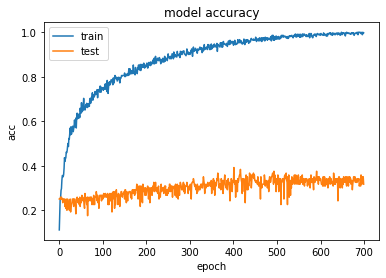

In [129]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [144]:
#test ston 3
train=(savee_new.loc[savee_new['actor'] != '(3)'])
trainfeatures = train.iloc[:, :-2]
trainlabel = train.iloc[:, -2]

In [145]:
train

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,emotion,actor
0,-320.564897,110.933802,12.457851,34.670754,11.628866,-2.938117,-24.859946,-2.633693,-0.919507,-11.532021,...,3.263025,2.756852,3.496057,5.099579,4.885279,5.633801,4.365917,3.453820,angry,(1)
1,-244.658678,104.249248,0.657434,41.458732,-1.098887,3.049909,-23.316795,-7.371824,-7.313963,-5.459172,...,4.096044,2.962424,3.240562,0.578126,1.794270,3.656604,4.363981,3.638848,angry,(2)
3,-564.540326,104.181913,26.302574,44.703341,17.196513,-4.453330,-15.700971,-2.773550,-5.163968,-11.310603,...,-0.331088,-2.861281,-2.723364,0.419460,2.015126,1.980087,-0.398496,-0.039357,angry,(4)
4,-299.408527,120.059306,-7.834544,18.676239,14.225895,-2.376180,-20.357823,3.748768,4.587472,-11.664485,...,1.987423,0.174960,-0.661590,-0.089371,-0.488558,1.521584,1.066419,-0.393785,angry,(1)
5,-268.415152,102.647185,-6.831019,21.777451,5.504902,2.677995,-17.891163,-4.412988,-3.229257,0.431965,...,-0.501339,-0.080925,0.131035,-1.918740,1.268647,2.679410,2.754248,3.670862,angry,(2)
7,-578.971084,153.140748,12.843857,13.583781,5.480952,-4.754079,-7.061755,1.223524,-7.304688,-13.289818,...,-0.666285,-2.915523,-1.297646,-1.285307,-1.099492,0.359853,-2.147516,-1.808127,angry,(4)
8,-337.160749,96.866740,4.881764,26.825063,10.724669,-2.182416,-13.945372,7.127122,-0.079204,-7.433390,...,4.924483,6.009026,6.636278,6.517982,6.425938,4.764662,3.565150,4.918953,angry,(1)
9,-313.978572,82.632110,3.121088,25.119724,6.733781,2.579732,-13.853373,0.178914,-1.616934,1.959738,...,1.821391,2.529989,1.968246,2.439394,3.644267,3.000721,4.114735,5.142286,angry,(2)
11,-619.683106,107.612664,29.545496,32.781815,13.113059,-2.023275,-6.724471,3.051477,-1.109710,-7.053607,...,-0.458534,-4.041868,-0.373413,1.693426,3.119295,6.467952,6.222947,7.158575,angry,(4)
12,-287.823871,101.515510,6.410148,15.656604,7.395868,-1.489299,-24.872378,-5.148656,-0.039547,-10.816283,...,2.069620,1.789086,1.402842,1.192773,2.013896,2.935015,3.895297,5.941611,angry,(1)


In [146]:
test=(savee_new.loc[savee_new['actor'] == '(3)'])
testfeatures = test.iloc[:, :-2]
testlabel = test.iloc[:, -2]

In [147]:

X_train=trainfeatures

X_test=testfeatures

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train=trainlabel
y_test=testlabel
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [148]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(7))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [150]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [151]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=700,validation_data=(x_testcnn, y_test))

Train on 360 samples, validate on 120 samples
Epoch 1/700
360/360 [==============================] - 0s 1ms/step - loss: 3.0699 - accuracy: 0.1389 - val_loss: 2.0113 - val_accuracy: 0.2583
Epoch 2/700
360/360 [==============================] - 0s 656us/step - loss: 2.1682 - accuracy: 0.2167 - val_loss: 1.8803 - val_accuracy: 0.2667
Epoch 3/700
360/360 [==============================] - 0s 659us/step - loss: 2.0705 - accuracy: 0.2083 - val_loss: 1.8764 - val_accuracy: 0.2917
Epoch 4/700
360/360 [==============================] - 0s 668us/step - loss: 2.0070 - accuracy: 0.2222 - val_loss: 1.8743 - val_accuracy: 0.3083
Epoch 5/700
360/360 [==============================] - 0s 648us/step - loss: 1.9491 - accuracy: 0.2250 - val_loss: 1.8488 - val_accuracy: 0.3250
Epoch 6/700
360/360 [==============================] - 0s 690us/step - loss: 1.9005 - accuracy: 0.2639 - val_loss: 1.8251 - val_accuracy: 0.2583
Epoch 7/700
360/360 [==============================] - 0s 654us/step - loss: 1.9218 - 

Epoch 57/700
360/360 [==============================] - 0s 665us/step - loss: 1.1721 - accuracy: 0.5472 - val_loss: 1.5683 - val_accuracy: 0.2667
Epoch 58/700
360/360 [==============================] - 0s 618us/step - loss: 1.1541 - accuracy: 0.5694 - val_loss: 1.5833 - val_accuracy: 0.3583
Epoch 59/700
360/360 [==============================] - 0s 682us/step - loss: 1.1236 - accuracy: 0.5694 - val_loss: 1.6455 - val_accuracy: 0.2917
Epoch 60/700
360/360 [==============================] - 0s 665us/step - loss: 1.1355 - accuracy: 0.5833 - val_loss: 1.5516 - val_accuracy: 0.3250
Epoch 61/700
360/360 [==============================] - 0s 643us/step - loss: 1.1362 - accuracy: 0.5833 - val_loss: 1.5118 - val_accuracy: 0.2917
Epoch 62/700
360/360 [==============================] - 0s 629us/step - loss: 1.1266 - accuracy: 0.6000 - val_loss: 1.5467 - val_accuracy: 0.3333
Epoch 63/700
360/360 [==============================] - 0s 623us/step - loss: 1.1183 - accuracy: 0.5806 - val_loss: 1.5747 -

360/360 [==============================] - 0s 615us/step - loss: 0.8802 - accuracy: 0.6722 - val_loss: 1.6263 - val_accuracy: 0.3000
Epoch 114/700
360/360 [==============================] - 0s 632us/step - loss: 0.8956 - accuracy: 0.6722 - val_loss: 1.6408 - val_accuracy: 0.3083
Epoch 115/700
360/360 [==============================] - 0s 634us/step - loss: 0.8945 - accuracy: 0.6444 - val_loss: 1.5741 - val_accuracy: 0.3333
Epoch 116/700
360/360 [==============================] - 0s 626us/step - loss: 0.8804 - accuracy: 0.6639 - val_loss: 1.6433 - val_accuracy: 0.2833
Epoch 117/700
360/360 [==============================] - 0s 621us/step - loss: 0.8765 - accuracy: 0.6694 - val_loss: 1.6991 - val_accuracy: 0.2667
Epoch 118/700
360/360 [==============================] - 0s 629us/step - loss: 0.8626 - accuracy: 0.6528 - val_loss: 1.6536 - val_accuracy: 0.3167
Epoch 119/700
360/360 [==============================] - 0s 615us/step - loss: 0.8834 - accuracy: 0.6889 - val_loss: 1.8068 - val_ac

Epoch 169/700
360/360 [==============================] - 0s 715us/step - loss: 0.7497 - accuracy: 0.7278 - val_loss: 1.7735 - val_accuracy: 0.2833
Epoch 170/700
360/360 [==============================] - 0s 684us/step - loss: 0.7336 - accuracy: 0.7361 - val_loss: 1.7342 - val_accuracy: 0.3167
Epoch 171/700
360/360 [==============================] - 0s 684us/step - loss: 0.7482 - accuracy: 0.7361 - val_loss: 1.6160 - val_accuracy: 0.3333
Epoch 172/700
360/360 [==============================] - 0s 634us/step - loss: 0.7397 - accuracy: 0.7306 - val_loss: 1.6626 - val_accuracy: 0.3000
Epoch 173/700
360/360 [==============================] - 0s 623us/step - loss: 0.7398 - accuracy: 0.7306 - val_loss: 1.8236 - val_accuracy: 0.2917
Epoch 174/700
360/360 [==============================] - 0s 670us/step - loss: 0.7461 - accuracy: 0.6917 - val_loss: 1.7527 - val_accuracy: 0.3083
Epoch 175/700
360/360 [==============================] - 0s 659us/step - loss: 0.7347 - accuracy: 0.7250 - val_loss: 1

Epoch 225/700
360/360 [==============================] - 0s 654us/step - loss: 0.6664 - accuracy: 0.7583 - val_loss: 1.8651 - val_accuracy: 0.3000
Epoch 226/700
360/360 [==============================] - 0s 672us/step - loss: 0.6513 - accuracy: 0.7556 - val_loss: 1.7774 - val_accuracy: 0.3000
Epoch 227/700
360/360 [==============================] - 0s 690us/step - loss: 0.6538 - accuracy: 0.7667 - val_loss: 1.7950 - val_accuracy: 0.2917
Epoch 228/700
360/360 [==============================] - 0s 701us/step - loss: 0.6453 - accuracy: 0.7611 - val_loss: 1.7192 - val_accuracy: 0.3500
Epoch 229/700
360/360 [==============================] - 0s 657us/step - loss: 0.6294 - accuracy: 0.7778 - val_loss: 1.8588 - val_accuracy: 0.3333
Epoch 230/700
360/360 [==============================] - 0s 640us/step - loss: 0.6471 - accuracy: 0.7639 - val_loss: 1.7891 - val_accuracy: 0.3417
Epoch 231/700
360/360 [==============================] - 0s 756us/step - loss: 0.6483 - accuracy: 0.7778 - val_loss: 1

Epoch 281/700
360/360 [==============================] - 0s 609us/step - loss: 0.5614 - accuracy: 0.8111 - val_loss: 1.7705 - val_accuracy: 0.3250
Epoch 282/700
360/360 [==============================] - 0s 611us/step - loss: 0.5605 - accuracy: 0.8028 - val_loss: 1.8574 - val_accuracy: 0.3000
Epoch 283/700
360/360 [==============================] - 0s 612us/step - loss: 0.5623 - accuracy: 0.8139 - val_loss: 1.8724 - val_accuracy: 0.3417
Epoch 284/700
360/360 [==============================] - 0s 659us/step - loss: 0.5649 - accuracy: 0.7972 - val_loss: 1.9171 - val_accuracy: 0.3333
Epoch 285/700
360/360 [==============================] - 0s 596us/step - loss: 0.5611 - accuracy: 0.8028 - val_loss: 1.9136 - val_accuracy: 0.3333
Epoch 286/700
360/360 [==============================] - 0s 609us/step - loss: 0.5675 - accuracy: 0.7972 - val_loss: 1.7975 - val_accuracy: 0.3583
Epoch 287/700
360/360 [==============================] - 0s 609us/step - loss: 0.5598 - accuracy: 0.8167 - val_loss: 1

Epoch 337/700
360/360 [==============================] - 0s 607us/step - loss: 0.4989 - accuracy: 0.8417 - val_loss: 1.9183 - val_accuracy: 0.3250
Epoch 338/700
360/360 [==============================] - 0s 576us/step - loss: 0.4888 - accuracy: 0.8250 - val_loss: 2.0733 - val_accuracy: 0.2500
Epoch 339/700
360/360 [==============================] - 0s 698us/step - loss: 0.4832 - accuracy: 0.8389 - val_loss: 1.9274 - val_accuracy: 0.3167
Epoch 340/700
360/360 [==============================] - 0s 657us/step - loss: 0.4936 - accuracy: 0.8333 - val_loss: 2.0188 - val_accuracy: 0.3083
Epoch 341/700
360/360 [==============================] - 0s 601us/step - loss: 0.4880 - accuracy: 0.8167 - val_loss: 2.0416 - val_accuracy: 0.2833
Epoch 342/700
360/360 [==============================] - 0s 621us/step - loss: 0.5019 - accuracy: 0.8194 - val_loss: 1.9426 - val_accuracy: 0.3333
Epoch 343/700
360/360 [==============================] - 0s 632us/step - loss: 0.5010 - accuracy: 0.8167 - val_loss: 2

Epoch 393/700
360/360 [==============================] - 0s 571us/step - loss: 0.4266 - accuracy: 0.8500 - val_loss: 2.1375 - val_accuracy: 0.2750
Epoch 394/700
360/360 [==============================] - 0s 573us/step - loss: 0.4234 - accuracy: 0.8778 - val_loss: 2.0514 - val_accuracy: 0.3167
Epoch 395/700
360/360 [==============================] - 0s 715us/step - loss: 0.4247 - accuracy: 0.8639 - val_loss: 2.1446 - val_accuracy: 0.3000
Epoch 396/700
360/360 [==============================] - 0s 695us/step - loss: 0.4230 - accuracy: 0.8556 - val_loss: 2.1077 - val_accuracy: 0.2667
Epoch 397/700
360/360 [==============================] - 0s 715us/step - loss: 0.4382 - accuracy: 0.8500 - val_loss: 2.1532 - val_accuracy: 0.3000
Epoch 398/700
360/360 [==============================] - 0s 568us/step - loss: 0.4352 - accuracy: 0.8583 - val_loss: 2.1673 - val_accuracy: 0.3000
Epoch 399/700
360/360 [==============================] - 0s 568us/step - loss: 0.4199 - accuracy: 0.8722 - val_loss: 2

Epoch 449/700
360/360 [==============================] - 0s 607us/step - loss: 0.3764 - accuracy: 0.8889 - val_loss: 2.2247 - val_accuracy: 0.2583
Epoch 450/700
360/360 [==============================] - 0s 571us/step - loss: 0.3771 - accuracy: 0.8917 - val_loss: 2.1485 - val_accuracy: 0.3000
Epoch 451/700
360/360 [==============================] - 0s 560us/step - loss: 0.3683 - accuracy: 0.9000 - val_loss: 2.1625 - val_accuracy: 0.2583
Epoch 452/700
360/360 [==============================] - 0s 596us/step - loss: 0.3759 - accuracy: 0.8944 - val_loss: 2.0690 - val_accuracy: 0.3083
Epoch 453/700
360/360 [==============================] - 0s 582us/step - loss: 0.3771 - accuracy: 0.8833 - val_loss: 2.1406 - val_accuracy: 0.2417
Epoch 454/700
360/360 [==============================] - 0s 585us/step - loss: 0.3755 - accuracy: 0.8833 - val_loss: 2.2164 - val_accuracy: 0.2667
Epoch 455/700
360/360 [==============================] - 0s 587us/step - loss: 0.3672 - accuracy: 0.8972 - val_loss: 2

Epoch 505/700
360/360 [==============================] - 0s 565us/step - loss: 0.3103 - accuracy: 0.9083 - val_loss: 2.2917 - val_accuracy: 0.2583
Epoch 506/700
360/360 [==============================] - 0s 560us/step - loss: 0.3166 - accuracy: 0.9167 - val_loss: 2.3405 - val_accuracy: 0.3000
Epoch 507/700
360/360 [==============================] - 0s 557us/step - loss: 0.3304 - accuracy: 0.8944 - val_loss: 2.2472 - val_accuracy: 0.2750
Epoch 508/700
360/360 [==============================] - 0s 601us/step - loss: 0.3173 - accuracy: 0.9194 - val_loss: 2.3028 - val_accuracy: 0.2667
Epoch 509/700
360/360 [==============================] - 0s 621us/step - loss: 0.3194 - accuracy: 0.8972 - val_loss: 2.2464 - val_accuracy: 0.2667
Epoch 510/700
360/360 [==============================] - 0s 629us/step - loss: 0.3328 - accuracy: 0.8917 - val_loss: 2.3810 - val_accuracy: 0.2667
Epoch 511/700
360/360 [==============================] - 0s 598us/step - loss: 0.3185 - accuracy: 0.9167 - val_loss: 2

Epoch 561/700
360/360 [==============================] - 0s 596us/step - loss: 0.2729 - accuracy: 0.9306 - val_loss: 2.4251 - val_accuracy: 0.2750
Epoch 562/700
360/360 [==============================] - 0s 612us/step - loss: 0.2772 - accuracy: 0.9222 - val_loss: 2.5455 - val_accuracy: 0.2917
Epoch 563/700
360/360 [==============================] - 0s 623us/step - loss: 0.2607 - accuracy: 0.9333 - val_loss: 2.3286 - val_accuracy: 0.2917
Epoch 564/700
360/360 [==============================] - 0s 609us/step - loss: 0.2725 - accuracy: 0.9333 - val_loss: 2.5236 - val_accuracy: 0.2833
Epoch 565/700
360/360 [==============================] - 0s 641us/step - loss: 0.2719 - accuracy: 0.9361 - val_loss: 2.5562 - val_accuracy: 0.2583
Epoch 566/700
360/360 [==============================] - 0s 654us/step - loss: 0.2945 - accuracy: 0.9167 - val_loss: 2.4493 - val_accuracy: 0.2833
Epoch 567/700
360/360 [==============================] - 0s 654us/step - loss: 0.2709 - accuracy: 0.9278 - val_loss: 2

Epoch 617/700
360/360 [==============================] - 0s 593us/step - loss: 0.2301 - accuracy: 0.9417 - val_loss: 2.4899 - val_accuracy: 0.2667
Epoch 618/700
360/360 [==============================] - 0s 554us/step - loss: 0.2402 - accuracy: 0.9528 - val_loss: 2.5012 - val_accuracy: 0.2833
Epoch 619/700
360/360 [==============================] - 0s 593us/step - loss: 0.2333 - accuracy: 0.9361 - val_loss: 2.6010 - val_accuracy: 0.2667
Epoch 620/700
360/360 [==============================] - 0s 590us/step - loss: 0.2223 - accuracy: 0.9500 - val_loss: 2.4989 - val_accuracy: 0.2917
Epoch 621/700
360/360 [==============================] - 0s 640us/step - loss: 0.2392 - accuracy: 0.9472 - val_loss: 2.5909 - val_accuracy: 0.2667
Epoch 622/700
360/360 [==============================] - 0s 615us/step - loss: 0.2398 - accuracy: 0.9278 - val_loss: 2.4607 - val_accuracy: 0.2583
Epoch 623/700
360/360 [==============================] - 0s 565us/step - loss: 0.2331 - accuracy: 0.9333 - val_loss: 2

Epoch 673/700
360/360 [==============================] - 0s 651us/step - loss: 0.2053 - accuracy: 0.9639 - val_loss: 2.7630 - val_accuracy: 0.2583
Epoch 674/700
360/360 [==============================] - 0s 609us/step - loss: 0.2004 - accuracy: 0.9611 - val_loss: 2.6422 - val_accuracy: 0.2750
Epoch 675/700
360/360 [==============================] - 0s 651us/step - loss: 0.2046 - accuracy: 0.9444 - val_loss: 2.8063 - val_accuracy: 0.2750
Epoch 676/700
360/360 [==============================] - 0s 648us/step - loss: 0.2001 - accuracy: 0.9556 - val_loss: 2.6739 - val_accuracy: 0.2833
Epoch 677/700
360/360 [==============================] - 0s 662us/step - loss: 0.2079 - accuracy: 0.9556 - val_loss: 2.6883 - val_accuracy: 0.2500
Epoch 678/700
360/360 [==============================] - 0s 648us/step - loss: 0.1995 - accuracy: 0.9583 - val_loss: 2.5612 - val_accuracy: 0.2917
Epoch 679/700
360/360 [==============================] - 0s 662us/step - loss: 0.1962 - accuracy: 0.9472 - val_loss: 2

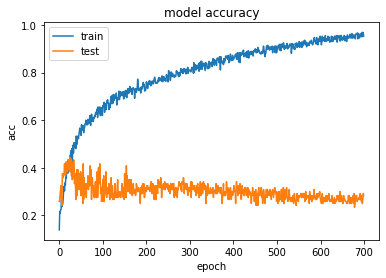

In [152]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [153]:
#test ston 2
train=(savee_new.loc[savee_new['actor'] != '(2)'])
trainfeatures = train.iloc[:, :-2]
trainlabel = train.iloc[:, -2]

In [154]:
test=(savee_new.loc[savee_new['actor'] == '(2)'])
testfeatures = test.iloc[:, :-2]
testlabel = test.iloc[:, -2]

In [158]:

X_train=trainfeatures

X_test=testfeatures

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train=trainlabel
y_test=testlabel
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(7))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [160]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [161]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=700,validation_data=(x_testcnn, y_test))

Train on 360 samples, validate on 120 samples
Epoch 1/700
360/360 [==============================] - 0s 1ms/step - loss: 3.7387 - accuracy: 0.1000 - val_loss: 2.4489 - val_accuracy: 0.2500
Epoch 2/700
360/360 [==============================] - 0s 668us/step - loss: 2.5735 - accuracy: 0.2222 - val_loss: 2.1424 - val_accuracy: 0.2500
Epoch 3/700
360/360 [==============================] - 0s 629us/step - loss: 2.2422 - accuracy: 0.2111 - val_loss: 1.9324 - val_accuracy: 0.2500 - loss: 2.3043 - accuracy: 0.18
Epoch 4/700
360/360 [==============================] - 0s 690us/step - loss: 2.0050 - accuracy: 0.2361 - val_loss: 1.7826 - val_accuracy: 0.2500
Epoch 5/700
360/360 [==============================] - 0s 696us/step - loss: 1.9088 - accuracy: 0.2778 - val_loss: 1.7701 - val_accuracy: 0.2500
Epoch 6/700
360/360 [==============================] - 0s 650us/step - loss: 1.9214 - accuracy: 0.2556 - val_loss: 1.7566 - val_accuracy: 0.2500
Epoch 7/700
360/360 [==============================] -

360/360 [==============================] - 0s 683us/step - loss: 1.2487 - accuracy: 0.5639 - val_loss: 1.1542 - val_accuracy: 0.5417
Epoch 57/700
360/360 [==============================] - 0s 645us/step - loss: 1.2099 - accuracy: 0.5639 - val_loss: 1.1473 - val_accuracy: 0.5917
Epoch 58/700
360/360 [==============================] - 0s 654us/step - loss: 1.1987 - accuracy: 0.6000 - val_loss: 1.1478 - val_accuracy: 0.5417
Epoch 59/700
360/360 [==============================] - 0s 654us/step - loss: 1.1905 - accuracy: 0.5750 - val_loss: 1.1566 - val_accuracy: 0.5750
Epoch 60/700
360/360 [==============================] - 0s 657us/step - loss: 1.1844 - accuracy: 0.5722 - val_loss: 1.1556 - val_accuracy: 0.5500
Epoch 61/700
360/360 [==============================] - 0s 637us/step - loss: 1.1817 - accuracy: 0.5806 - val_loss: 1.1261 - val_accuracy: 0.5833
Epoch 62/700
360/360 [==============================] - 0s 682us/step - loss: 1.1810 - accuracy: 0.5889 - val_loss: 1.1266 - val_accuracy

360/360 [==============================] - 0s 770us/step - loss: 0.9324 - accuracy: 0.6833 - val_loss: 1.0248 - val_accuracy: 0.6083
Epoch 113/700
360/360 [==============================] - 0s 731us/step - loss: 0.9174 - accuracy: 0.6833 - val_loss: 1.0420 - val_accuracy: 0.5417
Epoch 114/700
360/360 [==============================] - 0s 650us/step - loss: 0.9158 - accuracy: 0.6806 - val_loss: 1.0252 - val_accuracy: 0.6000
Epoch 115/700
360/360 [==============================] - 0s 645us/step - loss: 0.9078 - accuracy: 0.6944 - val_loss: 1.0271 - val_accuracy: 0.6167
Epoch 116/700
360/360 [==============================] - 0s 641us/step - loss: 0.9049 - accuracy: 0.7028 - val_loss: 0.9986 - val_accuracy: 0.5667
Epoch 117/700
360/360 [==============================] - 0s 643us/step - loss: 0.9162 - accuracy: 0.6944 - val_loss: 1.0283 - val_accuracy: 0.5833
Epoch 118/700
360/360 [==============================] - 0s 648us/step - loss: 0.9002 - accuracy: 0.6750 - val_loss: 1.0173 - val_ac

360/360 [==============================] - 0s 741us/step - loss: 0.7564 - accuracy: 0.7528 - val_loss: 1.0133 - val_accuracy: 0.6000
Epoch 168/700
360/360 [==============================] - 0s 718us/step - loss: 0.7560 - accuracy: 0.7389 - val_loss: 1.0434 - val_accuracy: 0.6167
Epoch 169/700
360/360 [==============================] - 0s 673us/step - loss: 0.7422 - accuracy: 0.7556 - val_loss: 1.0430 - val_accuracy: 0.6167
Epoch 170/700
360/360 [==============================] - 0s 643us/step - loss: 0.7543 - accuracy: 0.7389 - val_loss: 1.0551 - val_accuracy: 0.5833
Epoch 171/700
360/360 [==============================] - 0s 665us/step - loss: 0.7711 - accuracy: 0.7389 - val_loss: 1.0092 - val_accuracy: 0.6167
Epoch 172/700
360/360 [==============================] - 0s 645us/step - loss: 0.7529 - accuracy: 0.7500 - val_loss: 1.0435 - val_accuracy: 0.6333
Epoch 173/700
360/360 [==============================] - 0s 643us/step - loss: 0.7541 - accuracy: 0.7333 - val_loss: 1.0293 - val_ac

Epoch 223/700
360/360 [==============================] - 0s 676us/step - loss: 0.6466 - accuracy: 0.7861 - val_loss: 1.0650 - val_accuracy: 0.6167
Epoch 224/700
360/360 [==============================] - 0s 760us/step - loss: 0.6465 - accuracy: 0.7861 - val_loss: 1.0979 - val_accuracy: 0.6250
Epoch 225/700
360/360 [==============================] - 0s 712us/step - loss: 0.6227 - accuracy: 0.7944 - val_loss: 1.0757 - val_accuracy: 0.6250
Epoch 226/700
360/360 [==============================] - 0s 756us/step - loss: 0.6416 - accuracy: 0.7722 - val_loss: 1.0462 - val_accuracy: 0.6167
Epoch 227/700
360/360 [==============================] - 0s 762us/step - loss: 0.6507 - accuracy: 0.7861 - val_loss: 1.0848 - val_accuracy: 0.6083
Epoch 228/700
360/360 [==============================] - 0s 684us/step - loss: 0.6367 - accuracy: 0.7917 - val_loss: 1.0947 - val_accuracy: 0.6000
Epoch 229/700
360/360 [==============================] - 0s 812us/step - loss: 0.6274 - accuracy: 0.7833 - val_loss: 1

Epoch 279/700
360/360 [==============================] - 0s 645us/step - loss: 0.5415 - accuracy: 0.8278 - val_loss: 1.1325 - val_accuracy: 0.6083
Epoch 280/700
360/360 [==============================] - 0s 701us/step - loss: 0.5480 - accuracy: 0.8250 - val_loss: 1.1262 - val_accuracy: 0.5833
Epoch 281/700
360/360 [==============================] - 0s 659us/step - loss: 0.5490 - accuracy: 0.7944 - val_loss: 1.1362 - val_accuracy: 0.5833
Epoch 282/700
360/360 [==============================] - 0s 651us/step - loss: 0.5346 - accuracy: 0.8250 - val_loss: 1.1572 - val_accuracy: 0.5667
Epoch 283/700
360/360 [==============================] - 0s 654us/step - loss: 0.5468 - accuracy: 0.8194 - val_loss: 1.1120 - val_accuracy: 0.5917
Epoch 284/700
360/360 [==============================] - 0s 659us/step - loss: 0.5572 - accuracy: 0.8028 - val_loss: 1.1820 - val_accuracy: 0.5667
Epoch 285/700
360/360 [==============================] - 0s 657us/step - loss: 0.5363 - accuracy: 0.8194 - val_loss: 1

Epoch 335/700
360/360 [==============================] - 0s 690us/step - loss: 0.4672 - accuracy: 0.8639 - val_loss: 1.1806 - val_accuracy: 0.5667
Epoch 336/700
360/360 [==============================] - 0s 718us/step - loss: 0.4528 - accuracy: 0.8722 - val_loss: 1.1585 - val_accuracy: 0.5583
Epoch 337/700
360/360 [==============================] - 0s 705us/step - loss: 0.4541 - accuracy: 0.8444 - val_loss: 1.2162 - val_accuracy: 0.5500
Epoch 338/700
360/360 [==============================] - 0s 657us/step - loss: 0.4673 - accuracy: 0.8611 - val_loss: 1.2094 - val_accuracy: 0.5750
Epoch 339/700
360/360 [==============================] - 0s 665us/step - loss: 0.4477 - accuracy: 0.8667 - val_loss: 1.2475 - val_accuracy: 0.5583
Epoch 340/700
360/360 [==============================] - 0s 666us/step - loss: 0.4577 - accuracy: 0.8528 - val_loss: 1.1919 - val_accuracy: 0.5667
Epoch 341/700
360/360 [==============================] - 0s 687us/step - loss: 0.4582 - accuracy: 0.8472 - val_loss: 1

Epoch 391/700
360/360 [==============================] - 0s 762us/step - loss: 0.4066 - accuracy: 0.8778 - val_loss: 1.2723 - val_accuracy: 0.5583
Epoch 392/700
360/360 [==============================] - 0s 731us/step - loss: 0.4023 - accuracy: 0.8528 - val_loss: 1.2149 - val_accuracy: 0.5583
Epoch 393/700
360/360 [==============================] - 0s 823us/step - loss: 0.3996 - accuracy: 0.8778 - val_loss: 1.2647 - val_accuracy: 0.5500
Epoch 394/700
360/360 [==============================] - 0s 851us/step - loss: 0.3968 - accuracy: 0.8861 - val_loss: 1.3340 - val_accuracy: 0.5500
Epoch 395/700
360/360 [==============================] - 0s 756us/step - loss: 0.3970 - accuracy: 0.8917 - val_loss: 1.3158 - val_accuracy: 0.5333
Epoch 396/700
360/360 [==============================] - 0s 756us/step - loss: 0.3887 - accuracy: 0.8750 - val_loss: 1.3989 - val_accuracy: 0.4500
Epoch 397/700
360/360 [==============================] - 0s 767us/step - loss: 0.3813 - accuracy: 0.8750 - val_loss: 1

360/360 [==============================] - 0s 819us/step - loss: 0.3322 - accuracy: 0.9083 - val_loss: 1.3970 - val_accuracy: 0.4750
Epoch 447/700
360/360 [==============================] - 0s 644us/step - loss: 0.3520 - accuracy: 0.9000 - val_loss: 1.4423 - val_accuracy: 0.5250
Epoch 448/700
360/360 [==============================] - 0s 720us/step - loss: 0.3449 - accuracy: 0.9083 - val_loss: 1.3671 - val_accuracy: 0.5250
Epoch 449/700
360/360 [==============================] - 0s 668us/step - loss: 0.3285 - accuracy: 0.9167 - val_loss: 1.3812 - val_accuracy: 0.5417
Epoch 450/700
360/360 [==============================] - 0s 640us/step - loss: 0.3363 - accuracy: 0.9028 - val_loss: 1.3506 - val_accuracy: 0.5500
Epoch 451/700
360/360 [==============================] - 0s 762us/step - loss: 0.3555 - accuracy: 0.9028 - val_loss: 1.3961 - val_accuracy: 0.5417
Epoch 452/700
360/360 [==============================] - 0s 626us/step - loss: 0.3288 - accuracy: 0.9167 - val_loss: 1.4200 - val_ac

Epoch 502/700
360/360 [==============================] - 0s 657us/step - loss: 0.2995 - accuracy: 0.9167 - val_loss: 1.5313 - val_accuracy: 0.4583
Epoch 503/700
360/360 [==============================] - 0s 612us/step - loss: 0.2999 - accuracy: 0.9167 - val_loss: 1.4618 - val_accuracy: 0.5333
Epoch 504/700
360/360 [==============================] - 0s 621us/step - loss: 0.2833 - accuracy: 0.9306 - val_loss: 1.4339 - val_accuracy: 0.5667
Epoch 505/700
360/360 [==============================] - 0s 690us/step - loss: 0.2990 - accuracy: 0.9028 - val_loss: 1.4351 - val_accuracy: 0.5333
Epoch 506/700
360/360 [==============================] - 0s 643us/step - loss: 0.2997 - accuracy: 0.9222 - val_loss: 1.4773 - val_accuracy: 0.5167
Epoch 507/700
360/360 [==============================] - 0s 712us/step - loss: 0.2940 - accuracy: 0.9278 - val_loss: 1.5040 - val_accuracy: 0.5417
Epoch 508/700
360/360 [==============================] - 0s 643us/step - loss: 0.2969 - accuracy: 0.9139 - val_loss: 1

Epoch 558/700
360/360 [==============================] - 0s 682us/step - loss: 0.2493 - accuracy: 0.9306 - val_loss: 1.4968 - val_accuracy: 0.5250
Epoch 559/700
360/360 [==============================] - 0s 812us/step - loss: 0.2464 - accuracy: 0.9417 - val_loss: 1.6218 - val_accuracy: 0.4917
Epoch 560/700
360/360 [==============================] - 0s 737us/step - loss: 0.2491 - accuracy: 0.9361 - val_loss: 1.5522 - val_accuracy: 0.5250
Epoch 561/700
360/360 [==============================] - 0s 778us/step - loss: 0.2433 - accuracy: 0.9417 - val_loss: 1.5788 - val_accuracy: 0.5333
Epoch 562/700
360/360 [==============================] - 0s 726us/step - loss: 0.2457 - accuracy: 0.9417 - val_loss: 1.4337 - val_accuracy: 0.5500
Epoch 563/700
360/360 [==============================] - 0s 668us/step - loss: 0.2363 - accuracy: 0.9389 - val_loss: 1.5246 - val_accuracy: 0.5083
Epoch 564/700
360/360 [==============================] - 0s 652us/step - loss: 0.2424 - accuracy: 0.9500 - val_loss: 1

Epoch 614/700
360/360 [==============================] - 0s 673us/step - loss: 0.2077 - accuracy: 0.9472 - val_loss: 1.5316 - val_accuracy: 0.5250
Epoch 615/700
360/360 [==============================] - 0s 695us/step - loss: 0.2054 - accuracy: 0.9417 - val_loss: 1.5789 - val_accuracy: 0.5250
Epoch 616/700
360/360 [==============================] - 0s 706us/step - loss: 0.2007 - accuracy: 0.9500 - val_loss: 1.6384 - val_accuracy: 0.4917
Epoch 617/700
360/360 [==============================] - 0s 640us/step - loss: 0.1989 - accuracy: 0.9611 - val_loss: 1.5915 - val_accuracy: 0.4667
Epoch 618/700
360/360 [==============================] - 0s 719us/step - loss: 0.1978 - accuracy: 0.9694 - val_loss: 1.6856 - val_accuracy: 0.5333
Epoch 619/700
360/360 [==============================] - 0s 715us/step - loss: 0.1987 - accuracy: 0.9583 - val_loss: 1.6306 - val_accuracy: 0.4500
Epoch 620/700
360/360 [==============================] - 0s 679us/step - loss: 0.2001 - accuracy: 0.9556 - val_loss: 1

Epoch 670/700
360/360 [==============================] - 0s 666us/step - loss: 0.1680 - accuracy: 0.9611 - val_loss: 1.7034 - val_accuracy: 0.5167
Epoch 671/700
360/360 [==============================] - 0s 632us/step - loss: 0.1682 - accuracy: 0.9722 - val_loss: 1.7145 - val_accuracy: 0.5250
Epoch 672/700
360/360 [==============================] - 0s 698us/step - loss: 0.1648 - accuracy: 0.9667 - val_loss: 1.6725 - val_accuracy: 0.5333
Epoch 673/700
360/360 [==============================] - 0s 657us/step - loss: 0.1714 - accuracy: 0.9611 - val_loss: 1.6386 - val_accuracy: 0.5250
Epoch 674/700
360/360 [==============================] - 0s 683us/step - loss: 0.1654 - accuracy: 0.9611 - val_loss: 1.7670 - val_accuracy: 0.5083
Epoch 675/700
360/360 [==============================] - 0s 687us/step - loss: 0.1607 - accuracy: 0.9722 - val_loss: 1.6217 - val_accuracy: 0.5500
Epoch 676/700
360/360 [==============================] - 0s 706us/step - loss: 0.1660 - accuracy: 0.9722 - val_loss: 1

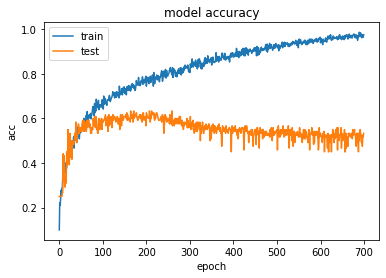

In [162]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [163]:
#test ston 1
train=(savee_new.loc[savee_new['actor'] != '(1)'])
trainfeatures = train.iloc[:, :-2]
trainlabel = train.iloc[:, -2]
test=(savee_new.loc[savee_new['actor'] == '(1)'])
testfeatures = test.iloc[:, :-2]
testlabel = test.iloc[:, -2]


In [164]:
X_train=trainfeatures

X_test=testfeatures

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train=trainlabel
y_test=testlabel
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [165]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(7))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [166]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [167]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=700,validation_data=(x_testcnn, y_test))

Train on 360 samples, validate on 120 samples
Epoch 1/700
360/360 [==============================] - 0s 1ms/step - loss: 2.7368 - accuracy: 0.1472 - val_loss: 1.9430 - val_accuracy: 0.1583
Epoch 2/700
360/360 [==============================] - 0s 693us/step - loss: 2.0063 - accuracy: 0.2111 - val_loss: 1.8133 - val_accuracy: 0.2667
Epoch 3/700
360/360 [==============================] - 0s 665us/step - loss: 1.9506 - accuracy: 0.2417 - val_loss: 1.7836 - val_accuracy: 0.2750
Epoch 4/700
360/360 [==============================] - 0s 687us/step - loss: 1.8919 - accuracy: 0.2861 - val_loss: 1.7609 - val_accuracy: 0.2917
Epoch 5/700
360/360 [==============================] - 0s 701us/step - loss: 1.8945 - accuracy: 0.2806 - val_loss: 1.7573 - val_accuracy: 0.3417
Epoch 6/700
360/360 [==============================] - 0s 640us/step - loss: 1.9186 - accuracy: 0.2778 - val_loss: 1.7280 - val_accuracy: 0.3917
Epoch 7/700
360/360 [==============================] - 0s 648us/step - loss: 1.8420 - 

Epoch 57/700
360/360 [==============================] - 0s 698us/step - loss: 1.2391 - accuracy: 0.5417 - val_loss: 1.2317 - val_accuracy: 0.5000
Epoch 58/700
360/360 [==============================] - 0s 770us/step - loss: 1.2132 - accuracy: 0.5250 - val_loss: 1.1772 - val_accuracy: 0.5167
Epoch 59/700
360/360 [==============================] - 0s 640us/step - loss: 1.2015 - accuracy: 0.5722 - val_loss: 1.2010 - val_accuracy: 0.4917
Epoch 60/700
360/360 [==============================] - 0s 621us/step - loss: 1.2056 - accuracy: 0.5389 - val_loss: 1.1915 - val_accuracy: 0.5583
Epoch 61/700
360/360 [==============================] - 0s 654us/step - loss: 1.2016 - accuracy: 0.5472 - val_loss: 1.1751 - val_accuracy: 0.5000
Epoch 62/700
360/360 [==============================] - 0s 612us/step - loss: 1.1929 - accuracy: 0.5417 - val_loss: 1.2070 - val_accuracy: 0.4917
Epoch 63/700
360/360 [==============================] - 0s 657us/step - loss: 1.1953 - accuracy: 0.5722 - val_loss: 1.1487 -

360/360 [==============================] - 0s 645us/step - loss: 0.9689 - accuracy: 0.6083 - val_loss: 1.1112 - val_accuracy: 0.5833
Epoch 114/700
360/360 [==============================] - 0s 742us/step - loss: 0.9665 - accuracy: 0.6389 - val_loss: 1.1274 - val_accuracy: 0.5500
Epoch 115/700
360/360 [==============================] - 0s 770us/step - loss: 0.9724 - accuracy: 0.6278 - val_loss: 1.1438 - val_accuracy: 0.5333
Epoch 116/700
360/360 [==============================] - 0s 731us/step - loss: 0.9735 - accuracy: 0.6167 - val_loss: 1.1113 - val_accuracy: 0.5333
Epoch 117/700
360/360 [==============================] - 0s 734us/step - loss: 0.9595 - accuracy: 0.6528 - val_loss: 1.1054 - val_accuracy: 0.5583
Epoch 118/700
360/360 [==============================] - 0s 709us/step - loss: 0.9394 - accuracy: 0.6500 - val_loss: 1.1406 - val_accuracy: 0.5167
Epoch 119/700
360/360 [==============================] - 0s 643us/step - loss: 0.9619 - accuracy: 0.6111 - val_loss: 1.1318 - val_ac

Epoch 169/700
360/360 [==============================] - 0s 565us/step - loss: 0.8157 - accuracy: 0.7194 - val_loss: 1.2626 - val_accuracy: 0.5000
Epoch 170/700
360/360 [==============================] - 0s 579us/step - loss: 0.8113 - accuracy: 0.6750 - val_loss: 1.2038 - val_accuracy: 0.5000
Epoch 171/700
360/360 [==============================] - 0s 565us/step - loss: 0.8244 - accuracy: 0.6778 - val_loss: 1.2107 - val_accuracy: 0.4917
Epoch 172/700
360/360 [==============================] - 0s 568us/step - loss: 0.8170 - accuracy: 0.6917 - val_loss: 1.1915 - val_accuracy: 0.5167
Epoch 173/700
360/360 [==============================] - 0s 573us/step - loss: 0.8187 - accuracy: 0.6694 - val_loss: 1.2016 - val_accuracy: 0.5083
Epoch 174/700
360/360 [==============================] - 0s 560us/step - loss: 0.8015 - accuracy: 0.6889 - val_loss: 1.1200 - val_accuracy: 0.5250
Epoch 175/700
360/360 [==============================] - 0s 562us/step - loss: 0.8153 - accuracy: 0.7000 - val_loss: 1

Epoch 225/700
360/360 [==============================] - 0s 636us/step - loss: 0.7350 - accuracy: 0.7278 - val_loss: 1.2297 - val_accuracy: 0.5167
Epoch 226/700
360/360 [==============================] - 0s 598us/step - loss: 0.7050 - accuracy: 0.7306 - val_loss: 1.2642 - val_accuracy: 0.5083
Epoch 227/700
360/360 [==============================] - 0s 601us/step - loss: 0.7176 - accuracy: 0.7139 - val_loss: 1.2579 - val_accuracy: 0.5083
Epoch 228/700
360/360 [==============================] - 0s 587us/step - loss: 0.7162 - accuracy: 0.7222 - val_loss: 1.3434 - val_accuracy: 0.4667
Epoch 229/700
360/360 [==============================] - 0s 604us/step - loss: 0.7107 - accuracy: 0.7361 - val_loss: 1.2828 - val_accuracy: 0.5333
Epoch 230/700
360/360 [==============================] - 0s 639us/step - loss: 0.7105 - accuracy: 0.7278 - val_loss: 1.3394 - val_accuracy: 0.5000
Epoch 231/700
360/360 [==============================] - 0s 560us/step - loss: 0.7176 - accuracy: 0.7222 - val_loss: 1

Epoch 281/700
360/360 [==============================] - 0s 557us/step - loss: 0.6220 - accuracy: 0.7694 - val_loss: 1.4411 - val_accuracy: 0.4750
Epoch 282/700
360/360 [==============================] - 0s 560us/step - loss: 0.6368 - accuracy: 0.7639 - val_loss: 1.3837 - val_accuracy: 0.4917
Epoch 283/700
360/360 [==============================] - 0s 551us/step - loss: 0.6342 - accuracy: 0.7806 - val_loss: 1.2914 - val_accuracy: 0.5167
Epoch 284/700
360/360 [==============================] - 0s 568us/step - loss: 0.6213 - accuracy: 0.8000 - val_loss: 1.4173 - val_accuracy: 0.4833
Epoch 285/700
360/360 [==============================] - 0s 565us/step - loss: 0.6280 - accuracy: 0.8056 - val_loss: 1.2948 - val_accuracy: 0.5250
Epoch 286/700
360/360 [==============================] - 0s 557us/step - loss: 0.6254 - accuracy: 0.7528 - val_loss: 1.2996 - val_accuracy: 0.5000
Epoch 287/700
360/360 [==============================] - 0s 551us/step - loss: 0.6314 - accuracy: 0.7583 - val_loss: 1

Epoch 337/700
360/360 [==============================] - 0s 557us/step - loss: 0.5699 - accuracy: 0.7833 - val_loss: 1.5299 - val_accuracy: 0.4750
Epoch 338/700
360/360 [==============================] - 0s 554us/step - loss: 0.5463 - accuracy: 0.8250 - val_loss: 1.4329 - val_accuracy: 0.5000
Epoch 339/700
360/360 [==============================] - 0s 571us/step - loss: 0.5464 - accuracy: 0.8250 - val_loss: 1.3879 - val_accuracy: 0.5250
Epoch 340/700
360/360 [==============================] - 0s 551us/step - loss: 0.5651 - accuracy: 0.8028 - val_loss: 1.4606 - val_accuracy: 0.4917
Epoch 341/700
360/360 [==============================] - 0s 562us/step - loss: 0.5481 - accuracy: 0.8389 - val_loss: 1.5586 - val_accuracy: 0.4750
Epoch 342/700
360/360 [==============================] - 0s 553us/step - loss: 0.5527 - accuracy: 0.8111 - val_loss: 1.4774 - val_accuracy: 0.4750
Epoch 343/700
360/360 [==============================] - 0s 560us/step - loss: 0.5439 - accuracy: 0.8278 - val_loss: 1

Epoch 393/700
360/360 [==============================] - 0s 576us/step - loss: 0.5023 - accuracy: 0.8083 - val_loss: 1.4739 - val_accuracy: 0.5000
Epoch 394/700
360/360 [==============================] - 0s 551us/step - loss: 0.4860 - accuracy: 0.8361 - val_loss: 1.6080 - val_accuracy: 0.4583
Epoch 395/700
360/360 [==============================] - 0s 560us/step - loss: 0.4871 - accuracy: 0.8417 - val_loss: 1.5957 - val_accuracy: 0.4750
Epoch 396/700
360/360 [==============================] - 0s 551us/step - loss: 0.4811 - accuracy: 0.8500 - val_loss: 1.4928 - val_accuracy: 0.4750
Epoch 397/700
360/360 [==============================] - 0s 607us/step - loss: 0.4882 - accuracy: 0.8333 - val_loss: 1.5339 - val_accuracy: 0.4917
Epoch 398/700
360/360 [==============================] - 0s 571us/step - loss: 0.4935 - accuracy: 0.8611 - val_loss: 1.6090 - val_accuracy: 0.5000
Epoch 399/700
360/360 [==============================] - 0s 573us/step - loss: 0.4908 - accuracy: 0.8444 - val_loss: 1

Epoch 449/700
360/360 [==============================] - 0s 565us/step - loss: 0.4253 - accuracy: 0.8778 - val_loss: 1.6261 - val_accuracy: 0.4750
Epoch 450/700
360/360 [==============================] - 0s 557us/step - loss: 0.4150 - accuracy: 0.8611 - val_loss: 1.6166 - val_accuracy: 0.4750
Epoch 451/700
360/360 [==============================] - 0s 565us/step - loss: 0.4103 - accuracy: 0.8889 - val_loss: 1.6046 - val_accuracy: 0.4667
Epoch 452/700
360/360 [==============================] - 0s 554us/step - loss: 0.4215 - accuracy: 0.8667 - val_loss: 1.7108 - val_accuracy: 0.4583
Epoch 453/700
360/360 [==============================] - 0s 568us/step - loss: 0.4355 - accuracy: 0.8500 - val_loss: 1.6375 - val_accuracy: 0.4667
Epoch 454/700
360/360 [==============================] - 0s 560us/step - loss: 0.4145 - accuracy: 0.8750 - val_loss: 1.6937 - val_accuracy: 0.4583
Epoch 455/700
360/360 [==============================] - 0s 551us/step - loss: 0.4009 - accuracy: 0.8778 - val_loss: 1

Epoch 505/700
360/360 [==============================] - 0s 560us/step - loss: 0.3610 - accuracy: 0.8833 - val_loss: 1.6551 - val_accuracy: 0.4833
Epoch 506/700
360/360 [==============================] - 0s 551us/step - loss: 0.3778 - accuracy: 0.8944 - val_loss: 1.7110 - val_accuracy: 0.4833
Epoch 507/700
360/360 [==============================] - 0s 571us/step - loss: 0.3609 - accuracy: 0.8944 - val_loss: 1.7509 - val_accuracy: 0.4833
Epoch 508/700
360/360 [==============================] - 0s 562us/step - loss: 0.3590 - accuracy: 0.9111 - val_loss: 1.8247 - val_accuracy: 0.4750
Epoch 509/700
360/360 [==============================] - 0s 560us/step - loss: 0.3719 - accuracy: 0.8778 - val_loss: 1.7960 - val_accuracy: 0.5000
Epoch 510/700
360/360 [==============================] - 0s 554us/step - loss: 0.3690 - accuracy: 0.9000 - val_loss: 1.7394 - val_accuracy: 0.4833
Epoch 511/700
360/360 [==============================] - 0s 557us/step - loss: 0.3661 - accuracy: 0.8889 - val_loss: 1

Epoch 561/700
360/360 [==============================] - 0s 579us/step - loss: 0.3183 - accuracy: 0.9111 - val_loss: 1.8524 - val_accuracy: 0.4667
Epoch 562/700
360/360 [==============================] - 0s 562us/step - loss: 0.3160 - accuracy: 0.9139 - val_loss: 1.8406 - val_accuracy: 0.4583
Epoch 563/700
360/360 [==============================] - 0s 551us/step - loss: 0.3103 - accuracy: 0.9194 - val_loss: 1.8224 - val_accuracy: 0.4750
Epoch 564/700
360/360 [==============================] - 0s 554us/step - loss: 0.3001 - accuracy: 0.9361 - val_loss: 1.8844 - val_accuracy: 0.4500
Epoch 565/700
360/360 [==============================] - 0s 560us/step - loss: 0.3114 - accuracy: 0.9222 - val_loss: 1.9502 - val_accuracy: 0.4667
Epoch 566/700
360/360 [==============================] - 0s 576us/step - loss: 0.3372 - accuracy: 0.8972 - val_loss: 1.8829 - val_accuracy: 0.4667
Epoch 567/700
360/360 [==============================] - 0s 565us/step - loss: 0.3232 - accuracy: 0.9056 - val_loss: 1

Epoch 617/700
360/360 [==============================] - 0s 585us/step - loss: 0.2842 - accuracy: 0.9194 - val_loss: 2.0638 - val_accuracy: 0.4583
Epoch 618/700
360/360 [==============================] - 0s 607us/step - loss: 0.2813 - accuracy: 0.9194 - val_loss: 2.0999 - val_accuracy: 0.4583
Epoch 619/700
360/360 [==============================] - 0s 609us/step - loss: 0.2769 - accuracy: 0.9306 - val_loss: 1.9456 - val_accuracy: 0.5000
Epoch 620/700
360/360 [==============================] - 0s 573us/step - loss: 0.2789 - accuracy: 0.9306 - val_loss: 2.1466 - val_accuracy: 0.4583
Epoch 621/700
360/360 [==============================] - 0s 562us/step - loss: 0.2729 - accuracy: 0.9389 - val_loss: 1.9600 - val_accuracy: 0.4583
Epoch 622/700
360/360 [==============================] - 0s 549us/step - loss: 0.2651 - accuracy: 0.9417 - val_loss: 2.0038 - val_accuracy: 0.4667
Epoch 623/700
360/360 [==============================] - 0s 549us/step - loss: 0.2704 - accuracy: 0.9222 - val_loss: 2

Epoch 673/700
360/360 [==============================] - 0s 560us/step - loss: 0.2371 - accuracy: 0.9500 - val_loss: 2.2374 - val_accuracy: 0.4500
Epoch 674/700
360/360 [==============================] - 0s 551us/step - loss: 0.2298 - accuracy: 0.9444 - val_loss: 2.1127 - val_accuracy: 0.4667
Epoch 675/700
360/360 [==============================] - 0s 573us/step - loss: 0.2223 - accuracy: 0.9500 - val_loss: 2.1358 - val_accuracy: 0.4833
Epoch 676/700
360/360 [==============================] - 0s 557us/step - loss: 0.2344 - accuracy: 0.9472 - val_loss: 2.1120 - val_accuracy: 0.4750
Epoch 677/700
360/360 [==============================] - 0s 560us/step - loss: 0.2311 - accuracy: 0.9472 - val_loss: 2.0414 - val_accuracy: 0.4750
Epoch 678/700
360/360 [==============================] - 0s 560us/step - loss: 0.2356 - accuracy: 0.9444 - val_loss: 2.0524 - val_accuracy: 0.4917
Epoch 679/700
360/360 [==============================] - 0s 554us/step - loss: 0.2138 - accuracy: 0.9722 - val_loss: 2

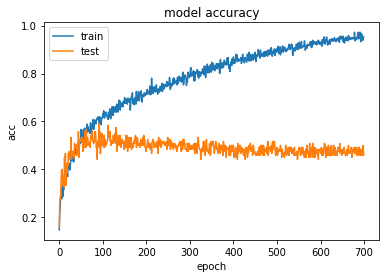

In [168]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()